# Import tools


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

# Loading the Dataset


In [4]:

filepath = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ["id", "clump_thickness","uniform_cell_size","uniform_cell_shape", "marginal_adhesion","signle_epithelial_size", "bare_nuclei", "bland", "normal_nucleoli", "mitoses", "class"]
df = pd.read_csv(filepath, names=names)

# processing of dataset


In [5]:

df.replace('?', -99999, inplace=True)
print(df.axes)
df.drop(["id"], 1, inplace=True)
#print the shape of the dataset 
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei', 'bland',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


# Do dataset visualizations

In [6]:
print(df.loc[6])
df.describe()

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
signle_epithelial_size     2
bare_nuclei               10
bland                      3
normal_nucleoli            1
mitoses                    1
class                      2
Name: 6, dtype: object


clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  signle_epithelial_size       bland  normal_nucleoli  \
count         699.000000              699.000000  699.000000       699.000000   
mean            2.806867                3.216023    3.437768         2.866953   
std             2.855379                2.214300    2.438364         3.053634   
min             1.000000                1.000000    1.000000         1.000000   
25%             1.000000                2.000000    2.000000         1.000000   
50%             1.000000                2.000000    3.000000         1.000000   
75%             4.000000                4.000000    5.000000         4.000000   
max            10.000000               10.000000   10.000000        10.000000   

          mitoses       class  
count  699.000000  699.000000  
mean     1.589413    2.689557  
std      1.715078    0.951273  
min      1.000000    2.000000  
25%      1.000000    2.000000  
50%      1.000000    2.000000  
75%      1.000000    4.000000  
max     10.000000    4.000000

# Plot histograms for each variable

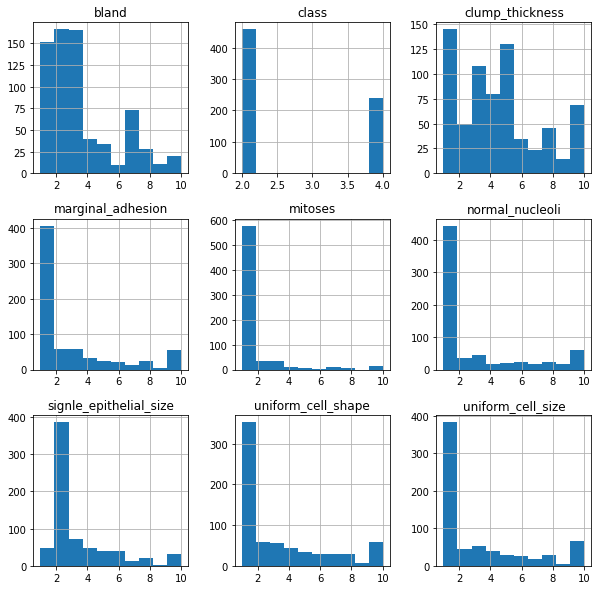

<Figure size 432x288 with 0 Axes>

In [8]:

df.hist(figsize=(10,10))
plt.show()
plt.savefig('hist_of_columns.png')

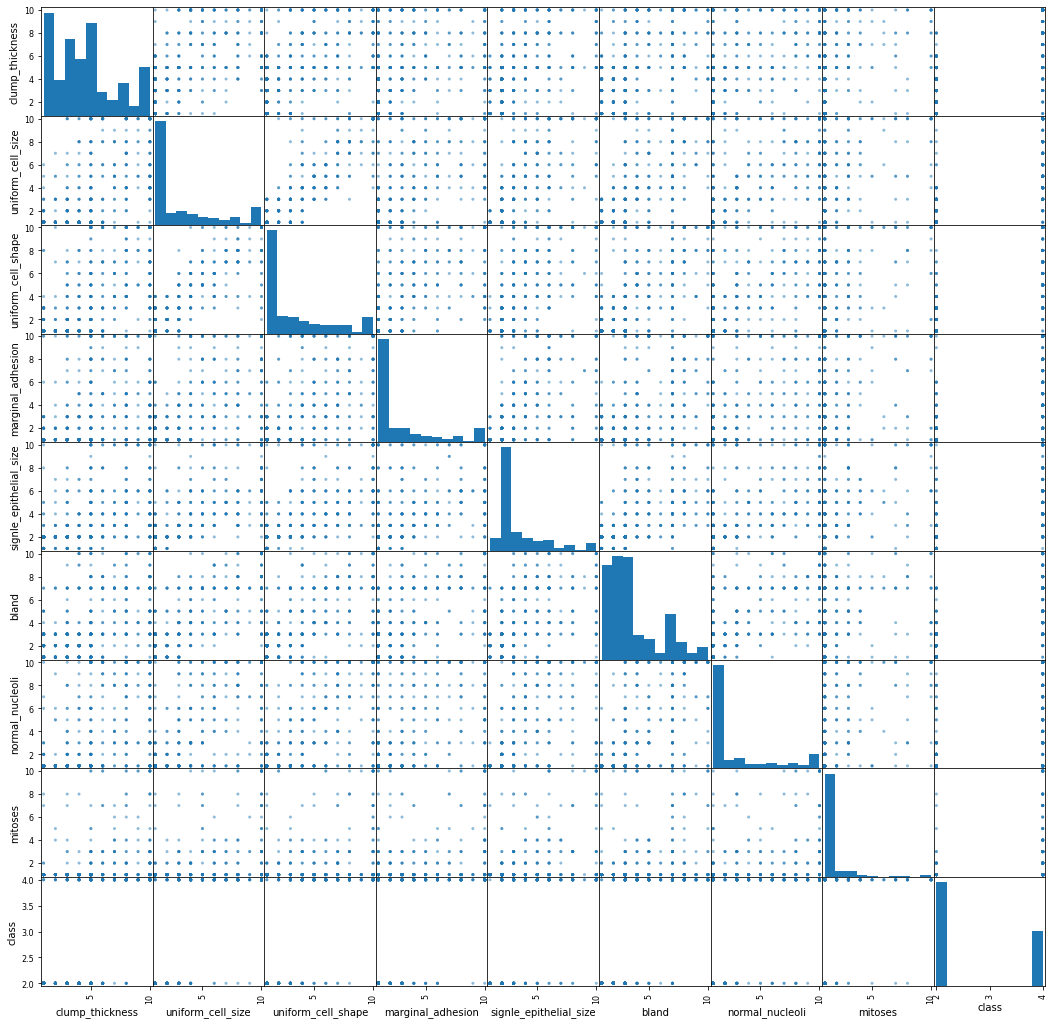

<Figure size 432x288 with 0 Axes>

In [9]:
scatter_matrix(df, figsize=(18, 18))
plt.show()
plt.savefig('feature_distribution.png')

<AxesSubplot:xlabel='uniform_cell_shape', ylabel='uniform_cell_size'>

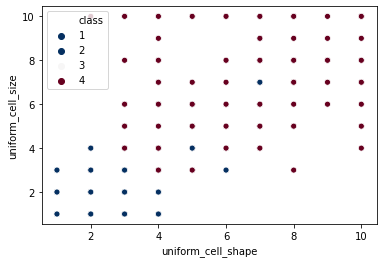

In [10]:
sns.scatterplot(x='uniform_cell_shape', y='uniform_cell_size', hue='class', palette="RdBu_r",data=df)

# Creating X and y datasets for training 

In [11]:

X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler    
sc = StandardScaler()

In [13]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Specify testing Options

In [14]:
# Testing Options
seed = 8
scoring = 'accuracy'

# Define the model to train

In [15]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
models = []
models.append(("KNN", KNeighborsClassifier(n_neighbors=7)))
models.append(("SVM", SVC()))

# Evaluate results 
results = []
names = []
val_acc = []
for name, model in models:
    kfold = sk.model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = sk.model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name , cv_results.mean(), cv_results.std())
    val_acc.append((name, cv_results.mean()))
    print(msg)


KNN: 0.953539 (0.038441)
SVM: 0.949968 (0.031711)


In [16]:
print(results)

[array([0.85714286, 0.96428571, 0.94642857, 0.98214286, 0.94642857,
       1.        , 0.98214286, 0.92857143, 0.94642857, 0.98181818]), array([0.875     , 0.96428571, 0.92857143, 0.96428571, 0.94642857,
       0.98214286, 0.98214286, 0.92857143, 0.94642857, 0.98181818])]


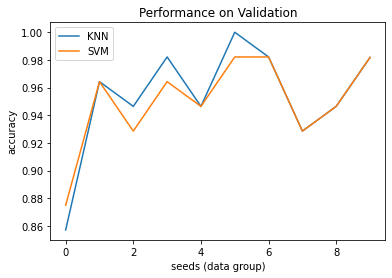

In [55]:
plt.plot(results[0], label = 'KNN')
plt.plot(results[1], label = 'SVM')
plt.title('Performance on Validation')
plt.ylabel('accuracy')
plt.xlabel('seeds (data group)')
plt.legend()
plt.savefig('PerformanceOverValData.png')

In [35]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

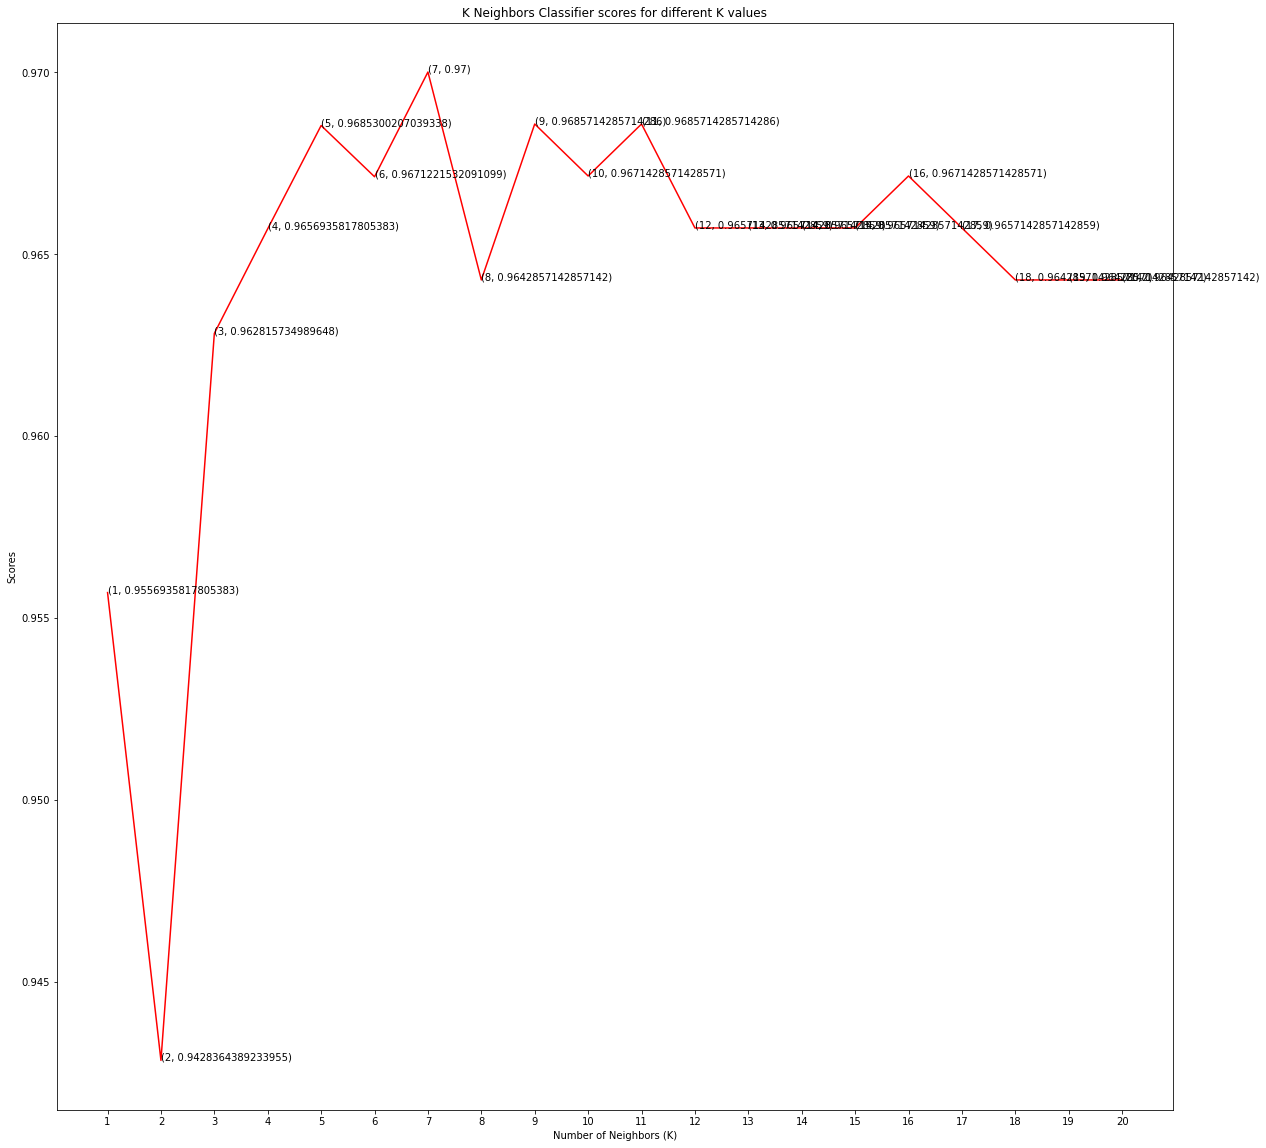

In [36]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.savefig('knn_scores.jpg')

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
test_acc =[]
for name , model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    test_acc.append((name,accuracy_score(y_test, predictions)))
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))


KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        85
           4       0.98      0.95      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.9642857142857143
              precision    recall  f1-score   support

           2       0.97      0.98      0.97        85
           4       0.96      0.95      0.95        55

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [38]:
model=  KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(prediction)
y_train_pred= prediction;

[2 2 2 2 4 2 4 2 4 4 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 2 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 2 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2]


In [39]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, prediction)

In [40]:
print('validation accuracy: ', val_acc)
print('test accuracy: ', test_acc)

validation accuracy:  [('KNN', 0.9535389610389611), ('SVM', 0.9499675324675325)]
test accuracy:  [('KNN', 0.9714285714285714), ('SVM', 0.9642857142857143)]


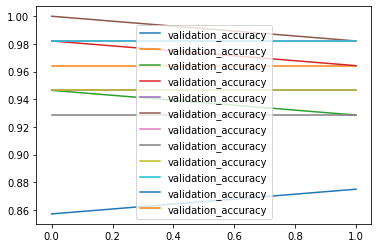

In [49]:
tr_val =[val_acc[0][1], val_acc[1][1]]
ts_val =[test_acc[0][1], test_acc[1][1]]
labels = ['validation_accuracy', 'test_accuracy']
plt.plot([tr_val], label = 'validation_accuracy')
plt.plot([tr_val], label = 'validation_accuracy')
plt.legend()

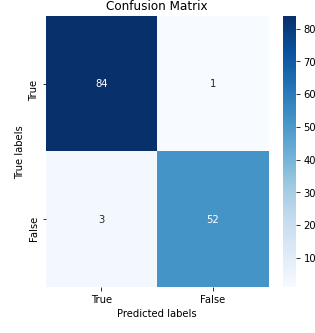

In [159]:
import seaborn as sns
plt.figure(figsize=(5,5))
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax, cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['True', 'False']); ax.yaxis.set_ticklabels(['True', 'False']);
plt.savefig('confusion_matrix.jpg')
